# Step 0. Parameter Setting 

In [1]:
import dtnmonitor_v2 as dtn
import os,sys


### P1. SELECT THE USERNAME 
## the user you want to monitor, usually the login account 
user="sc17"

### P2. SELECT THE INPUT FILE , 
## used in Step 1 : file IO read file
file_read_fio = "/data/disk0/sc17/test"


### P3. NUTTCP THREADS
## used in Step 2 :input threads number
count = 8

### P4. SELECT OUTPUT FILE , 
### used in Step 3 : nuttcp write file , the file number decides the amount of network flow threads 
file_write_nuttcp=[
"/data/disk0/sc17/w11",
"/data/disk1/sc17/w12",
"/data/disk2/sc17/w13",
"/data/disk3/sc17/w14",
"/data/disk4/sc17/w15",
"/data/disk5/sc17/w16",
"/data/disk6/sc17/w17",
"/data/disk7/sc17/w18",
    # "/foo/bar/filennn"
     ]


### P5.  SELECT THE MONITOR NETWORK INTERFACE  ###
## used in Step 4 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'ens1f0.3061'
#dtn.interface = 'eth1'
#dtn.interface = 'all'



## run fio and check status
### select graph_mode [0|1] 
#graph_mode=0  # all, 
#graph_mode=1  # 100pt
graph_mode=0  

### Show Disk and Interface
import netifaces
import os
list=netifaces.interfaces()
print("==========================================================")
print('{:40s} {:20s} '.format("Network Interface","IP"))
print("==========================================================")
for inf in list:
    #print(inf)
    ff=netifaces.ifaddresses(inf)
    #print(ff)
    try:
        addr=ff[netifaces.AF_INET][0]['addr']
    except:
        continue
    print('{:40s} {:20s} '.format(inf,addr)) 
import subprocess
import re
df = subprocess.Popen(["df","-h"], stdout=subprocess.PIPE)
output = df.communicate()[0]
dfs = output.decode("utf8").split("\n")
dfs.pop(0)
print("==========================================================")
print('{:35s} {:7s}  {:7s} {:7s}'.\
      format("Disk mountpoint","size","avail","used%"))
print("==========================================================")
for i in dfs:
    try:
        xx = re.sub(" +"," ",i).split(" ")
        if len(xx) == 6:
            device, size, used, available, percent, mountpoint = xx
            print('{:35s} {:7s}  {:7s} {:7s}'\
                  .format(mountpoint,size,available,percent))
    except:
        continue
        
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)

Network Interface                        IP                   
lo                                       127.0.0.1            
enp20s0                                  165.124.33.143       
ens1f0.3061                              192.168.61.50        
ens1f0.2038                              10.250.38.50         
ens4.1301                                10.10.14.251         
Disk mountpoint                     size     avail   used%  
/dev                                32G      32G     0%     
/dev/shm                            32G      32G     0%     
/run                                32G      32G     1%     
/sys/fs/cgroup                      32G      32G     0%     
/                                   50G      21G     60%    
/boot                               1014M    790M    23%    
/home                               151G     108G    29%    
/run/user/1001                      6.3G     6.3G    0%     
/run/user/2003                      6.3G     6.3G    0%     


# Step 1. Start servers for network by Iperf3

In [2]:
count= len(file_write_nuttcp)

for i in range(count):
    command = "iperf3 -s -D -p 5400"+ str(i) 
    #print(command)
    os.system(command)
    #dtn.exec_sysout(command)
    
exec_print("sleep 3 ;ps -u "+ user +" ux |grep iperf3")

sc17      2635  0.0  0.0  43076   508 ?        Ss   16:21   0:00 iperf3 -s -D -p 54000
sc17      2637  0.0  0.0  43076   508 ?        Ss   16:21   0:00 iperf3 -s -D -p 54001
sc17      2639  0.0  0.0  43076   504 ?        Ss   16:21   0:00 iperf3 -s -D -p 54002
sc17      2641  0.0  0.0  43076   508 ?        Ss   16:21   0:00 iperf3 -s -D -p 54003
sc17      2643  0.0  0.0  43076   504 ?        Ss   16:21   0:00 iperf3 -s -D -p 54004
sc17      2645  0.0  0.0  43076   504 ?        Ss   16:21   0:00 iperf3 -s -D -p 54005
sc17      2647  0.0  0.0  43076   508 ?        Ss   16:21   0:00 iperf3 -s -D -p 54006
sc17      2649  0.0  0.0  43076   504 ?        Ss   16:21   0:00 iperf3 -s -D -p 54007
sc17      2650  0.0  0.0 113136  2736 ?        S    16:21   0:00 /bin/sh -c sleep 3 ;ps -u sc17 ux |grep iperf3
sc17      2653  0.0  0.0 112664  2304 ?        S    16:21   0:00 grep iperf3


# Step 2. Start Monitor

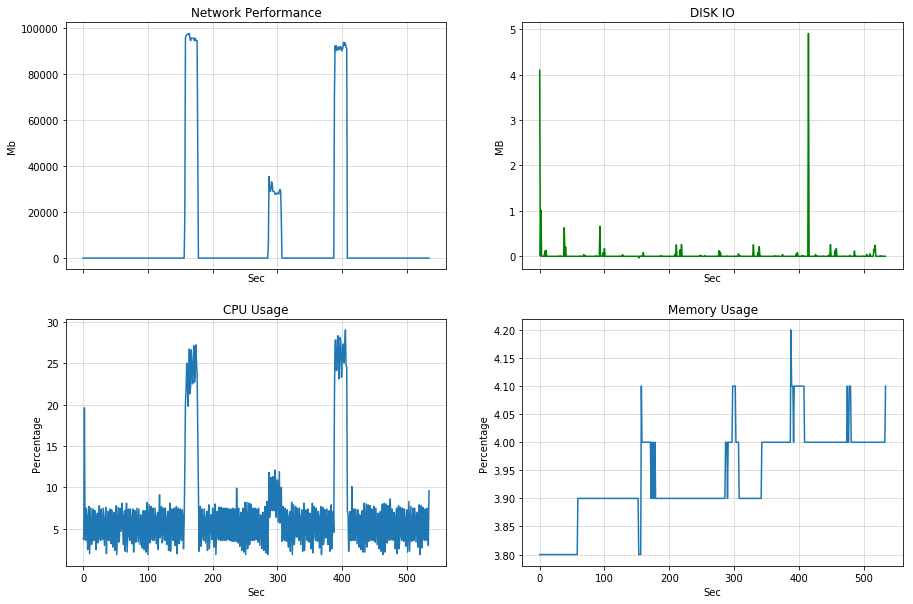

None

In [3]:
dtn.exec_command("python callmonitor_v2.py",graph_mode)

## Step A . stop the Iperf3 server

In [8]:
exec_print("killall -u "+user+" iperf3")

iperf3: no process found


## Step B . check Iperf3 server status

In [9]:
exec_print("ps -u "+ user +" ux |grep iperf3")

sc17      6400  0.0  0.0 113136  2784 ?        S    16:31   0:00 /bin/sh -c ps -u sc17 ux |grep iperf3
sc17      6402  0.0  0.0 112664  2288 ?        S    16:31   0:00 grep iperf3
